# Dataset Inspection
> Visualise some dataset and train-val-test split characteristics

In [28]:
from pathlib import Path

import mne
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
rawdata_dir = Path("../rawdata")
participants_tsv = pd.read_csv(rawdata_dir / "participants.tsv", sep="\t")

## Demographics
Check demographic (age and sex) distribution in each split

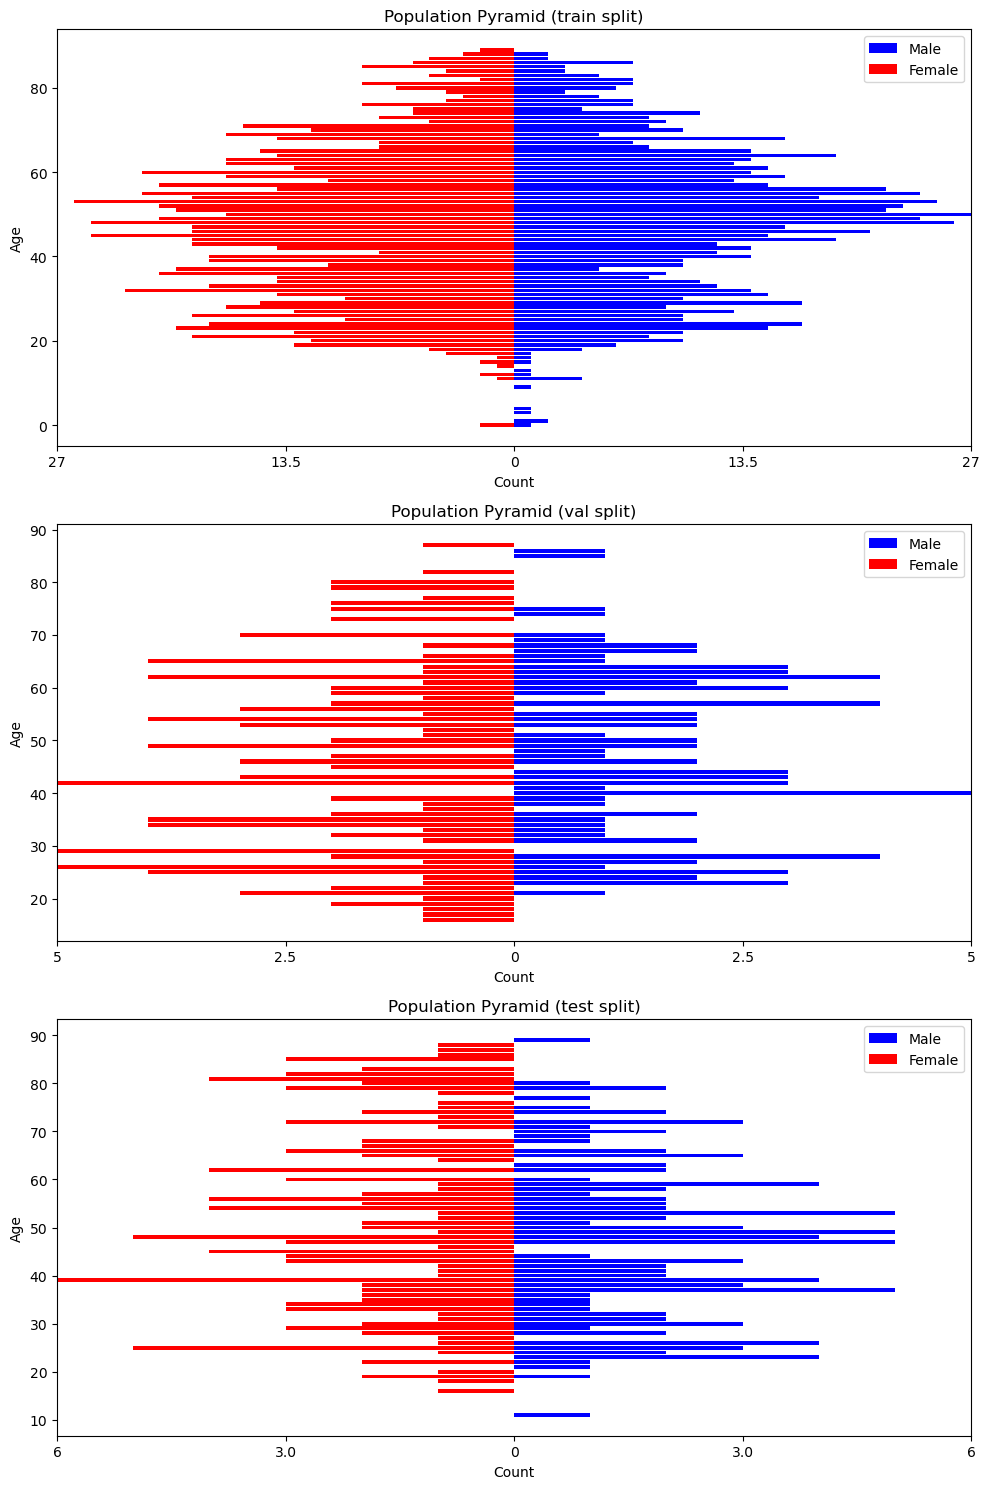

In [3]:
# Plot population pyramid for each split
splits = ['train', 'val', 'test']

# Create a figure with 3 subplots, one for each split
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

for i, split in enumerate(splits):
    # Filter data for the current split
    data = participants_tsv[participants_tsv['train_val_test_split'] == split]
    
    # Create a population pyramid plot
    male = data[data['sex'] == 'M']['age'].value_counts().sort_index()
    female = -data[data['sex'] == 'F']['age'].value_counts().sort_index()
    
    axes[i].barh(male.index, male.values, color='blue', label='Male')
    axes[i].barh(female.index, female.values, color='red', label='Female')
    
    # Set plot title and labels
    axes[i].set_title(f'Population Pyramid ({split} split)')
    axes[i].set_xlabel('Count')
    axes[i].set_ylabel('Age')
    axes[i].legend()
    
    # Make x-axis symmetric and set xticks to be positive in both directions
    max_x = max(male.max(), abs(female.min()))
    axes[i].set_xlim([-max_x, max_x])
    axes[i].set_xticks([-max_x, -max_x/2, 0, max_x/2, max_x])
    axes[i].set_xticklabels([max_x, max_x/2, 0, max_x/2, max_x])

plt.tight_layout()
plt.show()

In [4]:
# Number of normal and abnormal scans per split
participants_tsv.groupby("train_val_test_split")[["n_normal_recordings", "n_abnormal_recordings"]].sum()

,n_normal_recordings,n_abnormal_recordings
train_val_test_split,,
test,150,126
train,1235,1226
val,136,120


In [5]:
# Number of normal and abnormal subjects per split
# A subject is considered normal/abnormal if at least one of their scans is normal/abnormal
participants_tsv["normal_subject"] = participants_tsv["n_normal_recordings"] > 0
participants_tsv["abnormal_subject"] = participants_tsv["n_abnormal_recordings"] > 0
participants_tsv.groupby("train_val_test_split")[["normal_subject", "abnormal_subject"]].sum()

,normal_subject,abnormal_subject
train_val_test_split,,
test,148,105
train,1114,804
val,123,89


## Recording Durations

In [ ]:
# Extract recording durations (in minutes and floored to the nearest minute)
durations = []
files = list(rawdata_dir.glob("**/*.edf"))
for file in files:
    raw = mne.io.read_raw_edf(file, verbose=False)
    durations.append(raw.times[-1] // 60)  # in minutes

durations = pd.Series(durations)

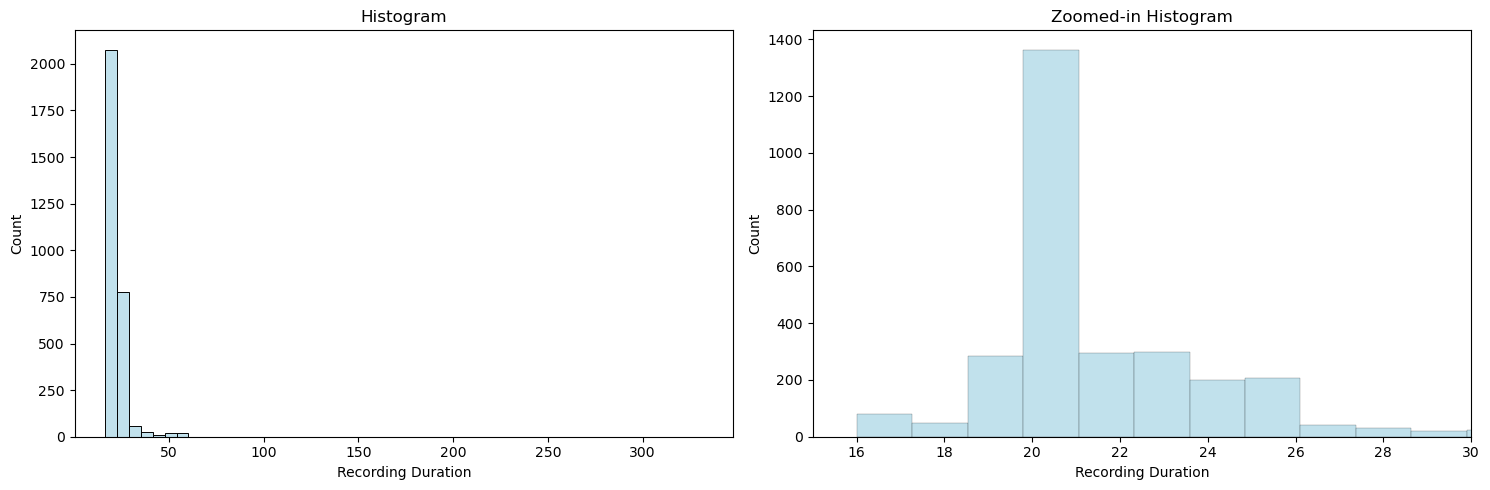

In [49]:
fig, axs = plt.subplots(1, 2, figsize=(15, 5))

# Original histogram
sns.histplot(durations, bins=50, color='lightblue', ax=axs[0])
axs[0].set_xlabel('Recording Duration')
axs[0].set_title('Histogram')

# Zoomed-in histogram
sns.histplot(durations, bins=250, color='lightblue', ax=axs[1])
axs[1].set_xlim(15, 30)  # Set x-axis limits for zoomed-in plot
axs[1].set_xlabel('Recording Duration')
axs[1].set_title('Zoomed-in Histogram')

plt.tight_layout()
plt.show()

In [53]:
durations.describe()

count    2993.000000
mean       22.470097
std         9.903707
min        16.000000
25%        20.000000
50%        21.000000
75%        23.000000
max       332.000000
dtype: float64

The minimum recording length is 16 minutes, most recordings are around 20 minutes long, and we have a few outliers with extremely long recordings of over 5h.